1. Create frequency histogram from file
2. Plot frequency
3. Determine k-means

In [84]:
from collections import Counter, OrderedDict

#file = "AttrNumber.txt"
file = "AttrSize.txt"

with open(file) as f:
    f= f.read()
    f = f.strip().split('\n')
    f = collections.Counter(f)

    
single = {}
double = {}
for k,v in f.items():
    pattern, k = k.split('|')
    #print( pattern, k, v )
    if pattern == 'single':
        single[float(k)] = v
    if pattern == '2PLN':
        double[float(k)] = v

single = OrderedDict(sorted(single.items(), key=lambda t: t[0]))
double = OrderedDict(sorted(double.items(), key=lambda t: t[0]))
single
#double

OrderedDict([(1.0, 3320),
             (1.2, 80),
             (1.25, 240),
             (1.33333333333333, 1120),
             (1.4, 80),
             (1.5, 1400),
             (1.66666666666667, 800),
             (2.0, 880),
             (2.5, 720),
             (3.0, 280),
             (3.5, 80)])

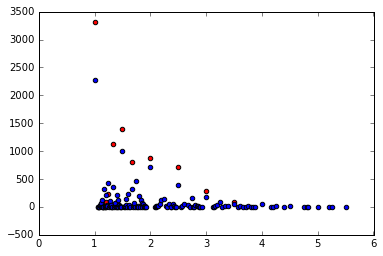

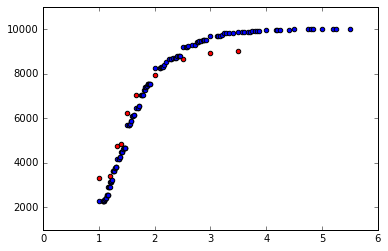

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter( list(single.keys()) , list(single.values()), c='r'  )
plt.scatter( list(double.keys()) , list(double.values()), c='b'  )
plt.show()


c = 0
sum_single = {}
for k,v in single.items():
    sum_single[k] = v+c
    c += v
sum_single = OrderedDict(sorted(sum_single.items(), key=lambda t: t[0]))

c = 0
sum_double = {}
for k,v in double.items():
    sum_double[k] = v+c
    c += v
sum_double = OrderedDict(sorted(sum_double.items(), key=lambda t: t[0]))


plt.scatter( list(sum_single.keys()) , list(sum_single.values()), c='r'  )
plt.scatter( list(sum_double.keys()) , list(sum_double.values()), c='b'  )
plt.show()


(array([[  3.19872597e+00,   9.38446875e+03],
       [  1.25184733e+00,   3.40764444e+03],
       [  1.72304458e+00,   6.69203226e+03]]), 611.8476556176845)


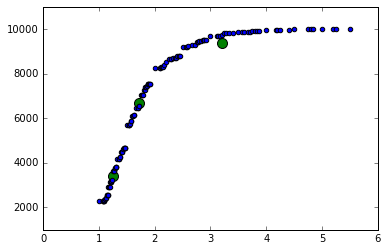

In [121]:
from numpy import array
from scipy.cluster.vq import vq, kmeans, whiten
features = np.array( [[k,v] for k,v in sum_double.items() ] )
#whitened = whiten(features) #normalize
whitened = features #not normalize
k = kmeans(whitened,3)
print(k)

plt.scatter( k[0][:,0] , k[0][:,1], c='g', s=100 )
plt.scatter( whitened[:,0] , whitened[:,1], c='b'  )
plt.show()

In [123]:
sum_single

OrderedDict([(1.0, 3320),
             (1.2, 3400),
             (1.25, 3640),
             (1.33333333333333, 4760),
             (1.4, 4840),
             (1.5, 6240),
             (1.66666666666667, 7040),
             (2.0, 7920),
             (2.5, 8640),
             (3.0, 8920),
             (3.5, 9000)])